# NBA MVP Prediction

## Appending the csv files to create the Dataset 

In [13]:
import pandas as pd
import pathlib
import random as rd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import time
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.neighbors import BallTree
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
# from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn import tree

from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

In [14]:
nba_dataset = pd.DataFrame()

for season in np.arange(1981,2021,1):
    df = pd.read_csv(f'./data/{season}_std.csv', low_memory=False)    
    nba_dataset = nba_dataset.append(df)

display(nba_dataset)
display(nba_dataset.info())

Player Pos  Age   Tm   G    MP   FG   FGA    FG%   3P  ...  \
0    Kareem Abdul-Jabbar   C   33  LAL  80  2976  836  1457  0.574    0  ...   
1          Tom Abernethy  SF   26  IND  39   298   25    59  0.424    0  ...   
2            Alvan Adams   C   26  PHO  75  2054  458   870  0.526    0  ...   
3         Darrell Allums  PF   22  DAL  22   276   23    67  0.343    0  ...   
4         Tiny Archibald  PG   32  BOS  80  2820  382   766  0.499    0  ...   
..                   ...  ..  ...  ...  ..   ...  ...   ...    ...  ...  ...   
524           Trae Young  PG   21  ATL  60  2120  546  1249  0.437  205  ...   
525          Cody Zeller   C   27  CHO  58  1341  251   479  0.524   18  ...   
526         Tyler Zeller   C   30  SAS   2     4    1     4  0.250    0  ...   
527           Ante Žižić   C   23  CLE  22   221   41    72  0.569    0  ...   
528          Ivica Zubac   C   22  LAC  72  1326  236   385  0.613    0  ...   

     WS/48  OBPM  DBPM   BPM  VORP  First  Share     Status  Season     W  
0    0.230   4.7   1.4   6.1   6.1      8  0.414  Candidate    1981  39.0  
1    0.062  -2.2  -0.4  -2.6   0.0      0  0.000        OOR    1981  44.0  
2    0.180   2.5   2.6   5.1   3.7      0  0.000        OOR    1981  45.0  
3   -0.054  -5.5  -0.1  -5.6  -0.3      0  0.000        OOR    1981  57.0  
4    0.118   0.9  -1.0  -0.1   1.4      0  0.046  Candidate    1981  62.0  
..     ...   ...   ...   ...   ...    ...    ...        ...     ...   ...  
524  0.133   6.2  -2.3   3.9   3.1      0  0.000        OOR    2020  20.0  
525  0.129   0.2  -0.8  -0.6   0.5      0  0.000        OOR    2020  23.0  
526 -0.075  -0.3 -22.1 -22.4   0.0      0  0.000        OOR    2020  32.0  
527  0.106  -1.7  -1.5  -3.2  -0.1      0  0.000        OOR    2020  19.0  
528  0.241   1.9   0.8   2.8   1.6      0  0.000        OOR    2020  49.0  

[16852 rows x 53 columns]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16852 entries, 0 to 528
Data columns (total 53 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  16852 non-null  object 
 1   Pos     16852 non-null  object 
 2   Age     16852 non-null  int64  
 3   Tm      16852 non-null  object 
 4   G       16852 non-null  int64  
 5   MP      16852 non-null  int64  
 6   FG      16852 non-null  int64  
 7   FGA     16852 non-null  int64  
 8   FG%     16852 non-null  float64
 9   3P      16852 non-null  int64  
 10  3PA     16852 non-null  int64  
 11  3P%     16852 non-null  float64
 12  2P      16852 non-null  int64  
 13  2PA     16852 non-null  int64  
 14  2P%     16852 non-null  float64
 15  eFG%    16852 non-null  float64
 16  FT      16852 non-null  int64  
 17  FTA     16852 non-null  int64  
 18  FT%     16852 non-null  float64
 19  ORB     16852 non-null  int64  
 20  DRB     16852 non-null  int64  
 21  TRB     16852 non-null  int64  
 22  

None

In [15]:
df_aux = nba_dataset.loc[nba_dataset['W'].isna() , ['Player','Season','W']] 
display(df_aux)


df_aux.to_csv('test.csv',index=False)


Player  Season   W
5        Dennis Awtrey    1981 NaN
6         James Bailey    1981 NaN
12         Henry Bibby    1981 NaN
25      Michael Brooks    1981 NaN
26          Fred Brown    1981 NaN
..                 ...     ...  ..
376  Amar'e Stoudemire    2004 NaN
394   Cezary Trybański    2004 NaN
402       Jake Voskuhl    2004 NaN
421       Jahidi White    2004 NaN
424       Chris Wilcox    2004 NaN

[730 rows x 3 columns]

Way too many features, we need to remove some of them.

## Feature Removing

In [3]:
cols = ['G','MP','FG','FG%','3P','2P','FT','TRB','DRB%','ORB%','OWS','DWS','WS/48','OBPM','DBPM','First']
print(f"Removing {len(cols)} features.")
nba_dataset = nba_dataset.drop(columns=cols)

Removing 16 features.


## Feature Analysis

<AxesSubplot:>

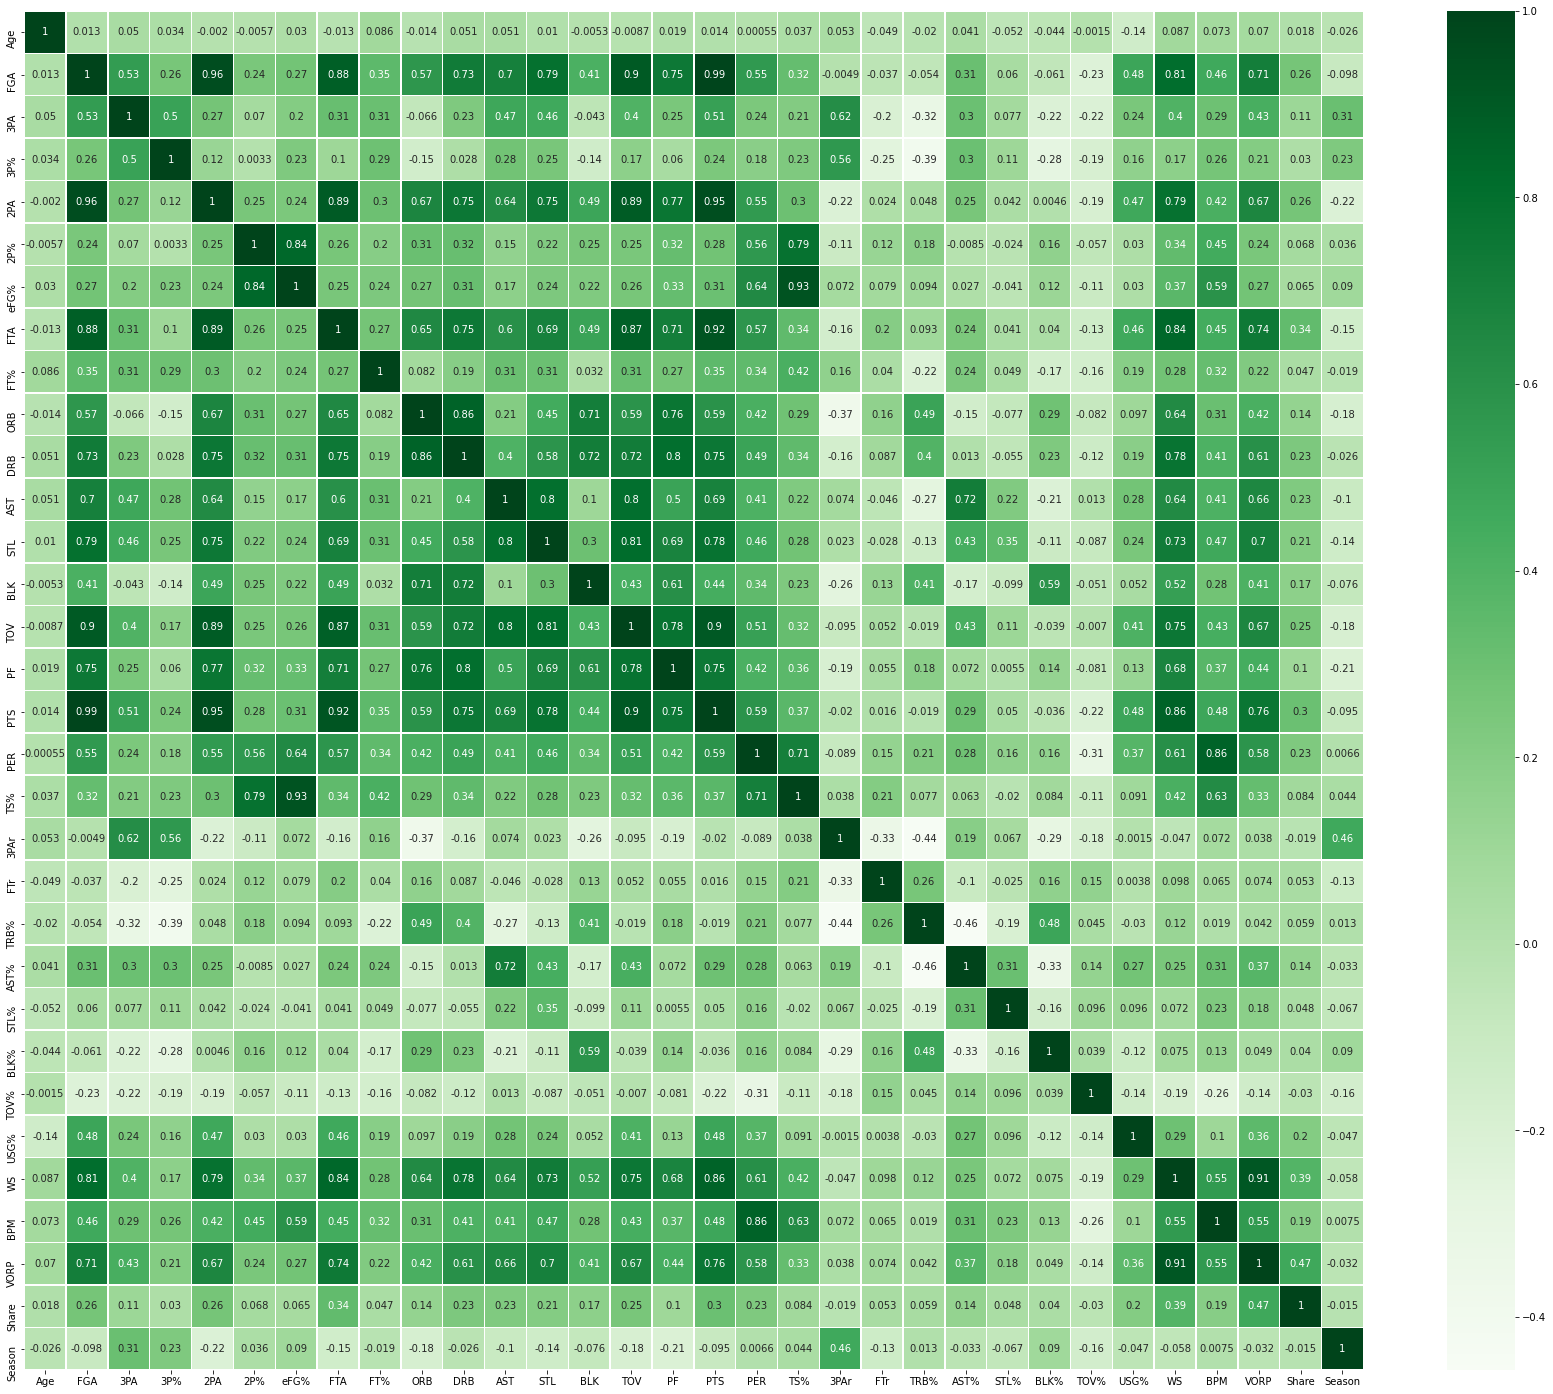

In [4]:
plt.figure(figsize=(30, 25))
sns.heatmap(nba_dataset.corr(), annot=True, cmap='Greens', linewidths=0.5)

I'm gonna keep some features just for further analysis. Once they are not usefull anymore I'll take them out.

## Outlier Analysis

### Functions Definition

In [5]:
def limit_calc(column):
    q1 = column.quantile(0.25)
    q3 = column.quantile(0.75)
    amplitude = q3 - q1
    return q1 - 1.5 * amplitude, q3 + 1.5 * amplitude

In [6]:
def boxplot(column):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(15, 5)
    sns.boxplot(x=column, ax=ax1)
    ax2.set_xlim(limit_calc(column))
    sns.boxplot(x=column, ax=ax2)
    
def histogram(column,color=None):
    plt.figure(figsize=(15, 5))
    sns.histplot(column,color=color)

def bar_chart(column):  
    plt.figure(figsize=(15, 5))
    ax = sns.barplot(x=column.value_counts().index, y=column.value_counts())
    ax.set_xlim(limit_calc(column))

### 3-Point Field Goal Percentage

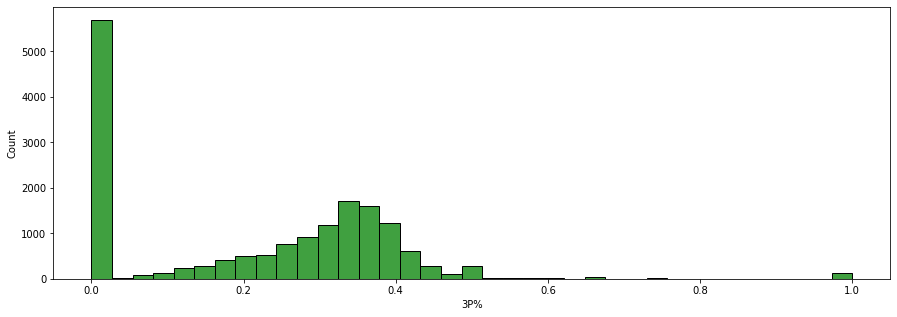

In [7]:
histogram(nba_dataset['3P%'],"Green")

Probably a fews guys had 1 3-pt attempt and managed to score. Those sharpshooters with 100% accuracy gonna be taken out.

Besides that, I gave 3 conditions to keep a player in the Dataset.
<ol>
    <li>Players within the margin: 0% ~ 60% </li>
    <li>Players with more than 60% accuracy can be counted if they tried at least 50 shoots in the season</li>
    <li>Kept the MVP and Candidates regardless their accuracy  </li>  
</ol>

In [8]:
min_val = 0.0
max_val = 0.6

df_size = nba_dataset.shape[0]
nba_dataset = nba_dataset.loc[((nba_dataset['3P%'] >= min_val) & (nba_dataset['3P%'] <= max_val)) 
                              | (nba_dataset['3P%'] > max_val) & (nba_dataset['3PA'] >= 50)
                              | (nba_dataset['Status'] != 'OOR'), :]
removed_rows = df_size - nba_dataset.shape[0]
print('{} rows removed'.format(removed_rows))

193 rows removed


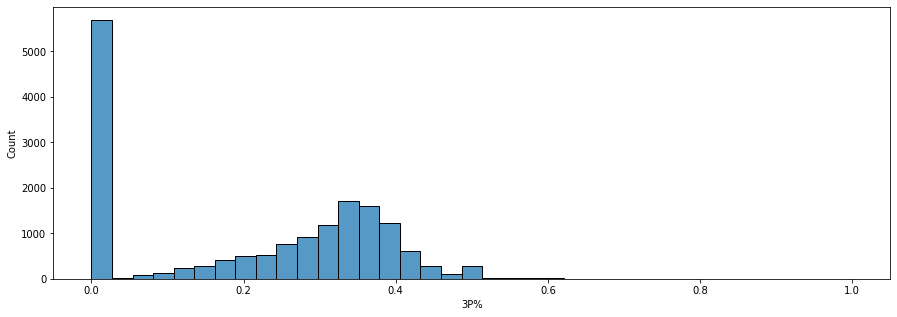

In [9]:
histogram(nba_dataset['3P%'])

### 2-Point Field Goal Percentage

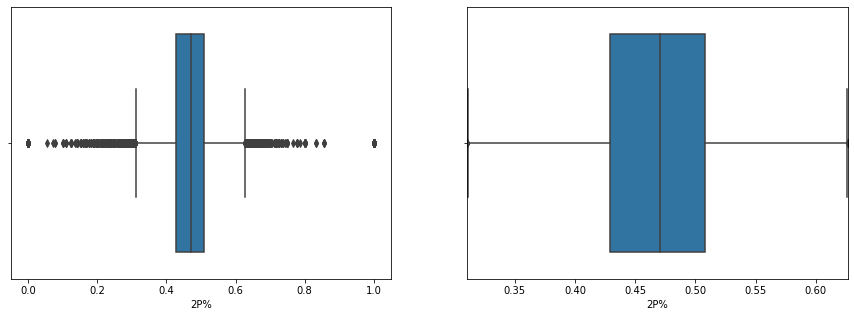

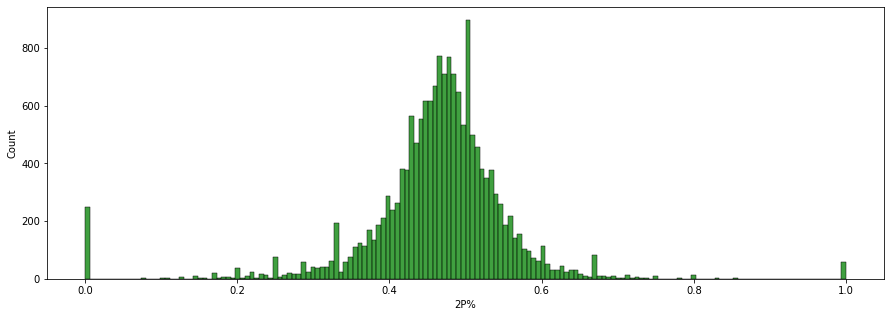

In [10]:
boxplot(nba_dataset['2P%'])
histogram(nba_dataset['2P%'],"Green")

Here again, some bench warmers are generating a few outliers.

The same 3 conditions will be repeated.<br> 
Here we gonna use a quantile (25% - 75%) calculation for the margins and we will consider 250 attempts to validate a outlier accuracy.

In [11]:
min_val, max_val = limit_calc(nba_dataset['2P%'])

df_size = nba_dataset.shape[0]
nba_dataset = nba_dataset.loc[((nba_dataset['2P%'] >= min_val) & (nba_dataset['2P%'] <= max_val)) 
                              | (nba_dataset['2P%'] > max_val) & (nba_dataset['2PA'] >= 250)
                              | (nba_dataset['Status'] != 'OOR'), :]
removed_rows = df_size - nba_dataset.shape[0]
print('{} rows removed'.format(removed_rows))

1039 rows removed


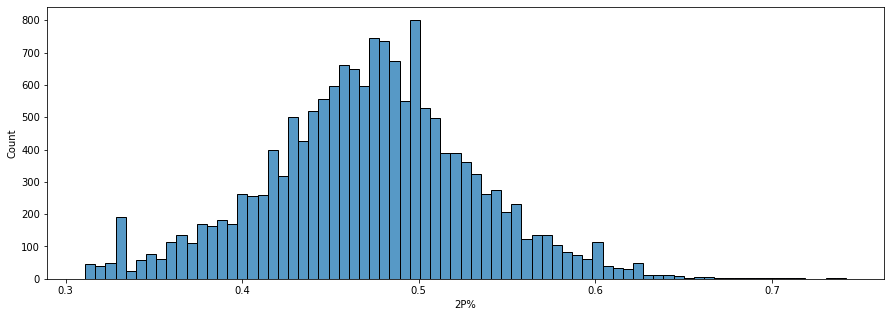

In [12]:
histogram(nba_dataset['2P%'])

We can see that there's still a few guys over 65% that may be outliers, let's check.

In [13]:
max_val = 0.65

outliers = nba_dataset.loc[(nba_dataset['2P%'] >= max_val) & (nba_dataset['2PA'] >= 250), :]
display(outliers)

Player Pos  Age  FGA  3PA    3P%  2PA    2P%   eFG%  FTA  ...  \
94       Artis Gilmore   C   31  816    0  0.000  816  0.670  0.670  532  ...   
329          Mark West   C   28  372    0  0.000  372  0.653  0.653  202  ...   
97       Erick Dampier   C   33  280    0  0.000  280  0.650  0.650  141  ...   
84      Tyson Chandler   C   28  407    0  0.000  407  0.654  0.654  295  ...   
245     DeAndre Jordan   C   22  341    1  0.000  340  0.688  0.686  217  ...   
85      Tyson Chandler   C   29  355    2  0.000  353  0.683  0.679  315  ...   
12      Chris Andersen   C   35  275   12  0.250  263  0.662  0.649  169  ...   
245     DeAndre Jordan   C   25  515    0  0.000  515  0.676  0.676  374  ...   
353      Mason Plumlee   C   23  302    3  0.000  299  0.666  0.659  195  ...   
474     Brandan Wright   C   26  331    0  0.000  331  0.677  0.677  106  ...   
88      Tyson Chandler   C   32  440    0  0.000  440  0.666  0.666  257  ...   
253     DeAndre Jordan   C   26  534    4  0.250  530  0.713  0.711  471  ...   
240     DeAndre Jordan   C   27  508    1  0.000  507  0.704  0.703  619  ...   
154        Rudy Gobert   C   24  625    1  0.000  624  0.662  0.661  476  ...   
174   Montrezl Harrell   C   23  345    7  0.143  338  0.663  0.654  121  ...   
239     DeAndre Jordan   C   28  577    2  0.000  575  0.717  0.714  425  ...   
292       JaVale McGee   C   29  319    3  0.000  316  0.658  0.652  111  ...   
84        Clint Capela   C   23  676    1  0.000  675  0.653  0.652  257  ...   
406       Jakob Poeltl   C   22  384    2  0.500  382  0.660  0.660  101  ...   
411      Dwight Powell   C   26  430   84  0.333  346  0.656  0.626  185  ...   
78       Thomas Bryant   C   21  502   99  0.333  403  0.685  0.648  137  ...   
186        Rudy Gobert   C   26  712    0  0.000  712  0.669  0.669  522  ...   
409      Dwight Powell   C   27  486  127  0.307  359  0.699  0.637  254  ...   
427  Mitchell Robinson   C   20  291    0  0.000  291  0.694  0.694  135  ...   
6        Jarrett Allen   C   21  465    6  0.000  459  0.658  0.649  270  ...   
101     Brandon Clarke  PF   23  479   64  0.359  415  0.658  0.642  112  ...   
175        Rudy Gobert   C   27  557    0  0.000  557  0.693  0.693  403  ...   
208       Jaxson Hayes   C   19  259    4  0.250  255  0.678  0.674  190  ...   
230      Dwight Howard   C   34  277    5  0.600  272  0.732  0.735  214  ...   
264     DeAndre Jordan   C   31  287    0  0.000  287  0.666  0.666  122  ...   
368       Nerlens Noel   C   25  269    3  0.333  266  0.688  0.686  106  ...   
427  Mitchell Robinson   C   21  341    0  0.000  341  0.742  0.742  148  ...   

     STL%  BLK%  TOV%  USG%    WS  BPM  VORP  Share     Status  Season  
94    0.8   4.0  18.4  18.5  12.3  4.3   4.5  0.006  Candidate    1981  
329   0.8   5.1  18.3  11.1   5.5  1.0   1.5  0.000        OOR    1989  
97    0.7   3.8  17.8  10.4   6.1  0.6   1.2  0.000        OOR    2009  
84    0.9   3.0  14.1  14.2   9.4  1.5   1.8  0.000        OOR    2011  
245   1.0   5.4  18.8  11.7   5.2 -0.7   0.7  0.000        OOR    2011  
85    1.4   3.4  17.1  13.0   9.5  2.3   2.2  0.000        OOR    2012  
12    1.2   6.1  13.2  13.8   6.0  1.2   1.1  0.000        OOR    2014  
245   1.4   5.4  15.3  12.4  11.1  2.5   3.3  0.000        OOR    2014  
353   2.0   3.6  16.6  17.1   4.7  1.0   1.0  0.000        OOR    2014  
474   1.5   4.2   8.5  17.4   5.1  3.4   1.5  0.000        OOR    2014  
88    0.9   3.2  16.0  12.8  10.3  2.6   2.7  0.000        OOR    2015  
253   1.5   5.4  12.8  13.6  12.8  2.9   3.5  0.000        OOR    2015  
240   1.0   5.4  12.1  15.4  11.5  2.8   3.2  0.000        OOR    2016  
154   0.9   6.4  15.0  16.7  14.3  4.4   4.4  0.000        OOR    2017  
174   0.9   3.2   9.9  17.6   4.1  1.0   0.8  0.000        OOR    2017  
239   1.0   4.3  13.1  15.3  11.8  3.3   3.5  0.000        OOR    2017  
292   1.2   7.1   9.8  23.8   3.5  1.2   0.6  0.000        OOR    2017  
84    1.4   5.7  11.5  19.4 

As expected, all centers that love the rim.

### FT% : Free Throw Percentage

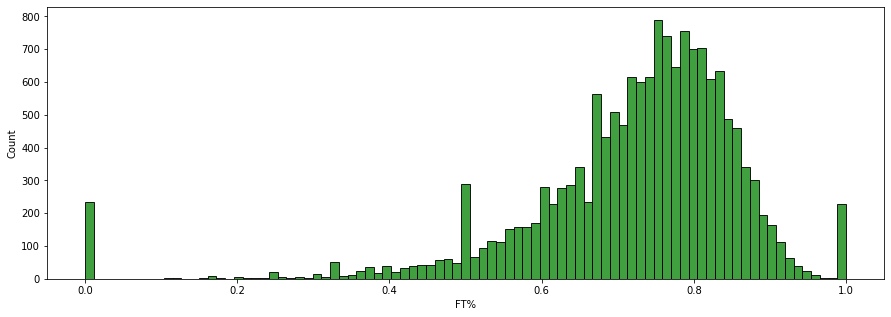

In [14]:
histogram(nba_dataset['FT%'],"Green")

It seems that too many guys had 0% or 100% accuracy. Again, weird numbers.

Gonna treat that, by taking the mean of Free Throw Attempts in count.

In [15]:
print(f"FTA mean: {nba_dataset['FTA'].mean():.0F}")

FTA mean: 146


So let's consider one third of the FTA mean (50 attempts) as the margin and see what happens.

In [16]:
df_size = nba_dataset.shape[0]
nba_dataset = nba_dataset.loc[(nba_dataset['FTA'] >= 50)
                              | (nba_dataset['Status'] != 'OOR'), :]
removed_rows = df_size - nba_dataset.shape[0]
print('{} rows removed'.format(removed_rows))

4671 rows removed


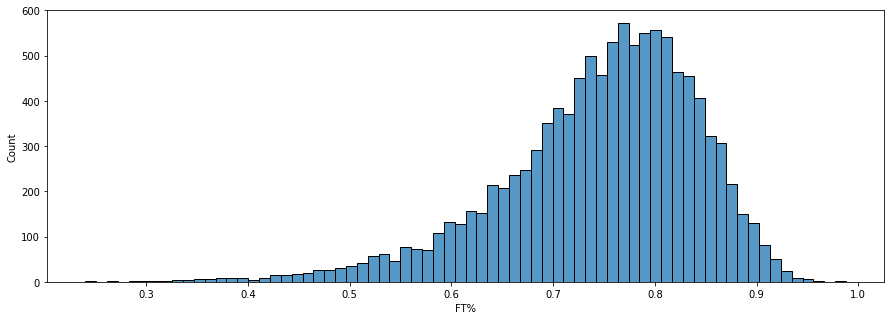

In [17]:
histogram(nba_dataset['FT%'])

#### Fun Fact Section

If you are wondering who are the guys below 35% free throw accuracy with 50 or more attempts, here are the nominees: 

In [18]:
dfloosers = nba_dataset.loc[(nba_dataset['FTA'] >= 50)
                        & (nba_dataset['FT%'] <= 0.35), ['Player','Pos','FTA','FT%','Season']]

display(dfloosers.sort_values(by=['FT%','FTA'], ascending=[True,False]))

Player Pos  FTA    FT%  Season
313       Larry Smith  PF   50  0.240    1991
323    Olden Polynice   C   65  0.262    2001
128       Joey Dorsey  PF   83  0.289    2015
292       Ian Mahinmi   C  102  0.304    2015
284       Larry Smith  PF   58  0.310    1989
322    Olden Polynice   C   90  0.311    2000
86       Chris Dudley  PF  182  0.319    1990
51         Josh Boone  PF   58  0.328    2010
192     Steven Hunter   C   69  0.333    2004
110     DeSagana Diop   C   66  0.333    2009
416       Ben Wallace   C   57  0.333    2011
414       Ben Wallace   C  238  0.336    2001
65        Kwame Brown   C   98  0.337    2010
261     Eric Montross   C   62  0.339    1997
445        Jan Veselý  PF   56  0.339    2014
411  Lorenzo Williams   C   70  0.343    1996
55       Andrew Bogut   C   64  0.344    2014

A few famous names here. Congrats to the Wizards on drafting Kwame Brown as a first pick.

I think the ones with more than 95% should also have their names listed, so here it goes:

In [19]:
dfwow = nba_dataset.loc[(nba_dataset['FTA'] >= 50)
                        & (nba_dataset['FT%'] >= 0.95), ['Player','Pos','FTA','FT%','Season']]

display(dfwow.sort_values(by=['FT%','FTA'], ascending=[False,False]))

Player Pos  FTA    FT%  Season
50      Terrell Brandon  PG   84  0.988    2002
73        José Calderón  PG  154  0.981    2009
201       Calvin Murphy  PG  215  0.958    1981
1    Mahmoud Abdul-Rauf  PG  229  0.956    1994
9             Ray Allen  SG  249  0.952    2009
271          Mark Price  PG   62  0.952    1991
15        Ryan Anderson  PF   62  0.952    2014
178       Jeff Hornacek  SG  180  0.950    2000

Now that the hard work is done, we can take out the attempts features.

In [20]:
nba_dataset = nba_dataset.drop(columns=['3PA','2PA','FTA','FGA','3PAr','FTr'])
display(nba_dataset)
nba_dataset.info()

Player Pos  Age    3P%    2P%   eFG%    FT%  ORB  DRB  AST  \
0    Kareem Abdul-Jabbar   C   33  0.000  0.574  0.574  0.766  197  624  272   
2            Alvan Adams   C   26  0.000  0.526  0.526  0.768  157  389  344   
4         Tiny Archibald  PG   32  0.000  0.505  0.499  0.816   36  140  618   
6           James Bailey  PF   23  0.500  0.499  0.500  0.709  192  415   98   
7           Greg Ballard  SF   26  0.219  0.470  0.466  0.847  167  413  195   
..                   ...  ..  ...    ...    ...    ...    ...  ...  ...  ...   
521         Delon Wright  PG   27  0.370  0.504  0.519  0.770   70  210  244   
523       Thaddeus Young  PF   31  0.356  0.501  0.513  0.583   94  221  117   
524           Trae Young  PG   21  0.361  0.501  0.519  0.860   32  223  560   
525          Cody Zeller   C   27  0.240  0.577  0.543  0.682  160  251   88   
528          Ivica Zubac   C   22  0.000  0.616  0.613  0.747  197  346   82   

     ...  STL%  BLK%  TOV%  USG%    WS  BPM  VORP  Share     Status  Season  
0    ...   0.9   4.0  12.8  26.3  14.3  6.1   6.1  0.414  Candidate    1981  
2    ...   2.4   1.9  18.7  23.0   7.7  5.1   3.7  0.000        OOR    1981  
4    ...   1.3   0.4  21.8  17.5   6.9 -0.1   1.4  0.046  Candidate    1981  
6    ...   1.4   3.1  17.3  20.3   4.9 -1.1   0.6  0.000        OOR    1981  
7    ...   2.1   0.8   8.4  21.4   6.9  2.2   2.8  0.000        OOR    1981  
..   ...   ...   ...   ...   ...   ...  ...   ...    ...        ...     ...  
521  ...   2.6   1.2  13.8  14.4   4.4  1.9   1.5  0.000        OOR    2020  
523  ...   2.8   1.4  13.9  19.7   1.9 -1.2   0.3  0.000        OOR    2020  
524  ...   1.4   0.3  16.2  34.9   5.9  3.9   3.1  0.000        OOR    2020  
525  ...   1.5   1.7  11.9  20.8   3.6 -0.6   0.5  0.000        OOR    2020  
528  ...   0.6   4.4  11.8  16.4   6.6  2.8   1.6  0.000        OOR    2020  

[10949 rows x 29 columns]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10949 entries, 0 to 528
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  10949 non-null  object 
 1   Pos     10949 non-null  object 
 2   Age     10949 non-null  int64  
 3   3P%     10949 non-null  float64
 4   2P%     10949 non-null  float64
 5   eFG%    10949 non-null  float64
 6   FT%     10949 non-null  float64
 7   ORB     10949 non-null  int64  
 8   DRB     10949 non-null  int64  
 9   AST     10949 non-null  int64  
 10  STL     10949 non-null  int64  
 11  BLK     10949 non-null  int64  
 12  TOV     10949 non-null  int64  
 13  PF      10949 non-null  int64  
 14  PTS     10949 non-null  int64  
 15  PER     10949 non-null  float64
 16  TS%     10949 non-null  float64
 17  TRB%    10949 non-null  float64
 18  AST%    10949 non-null  float64
 19  STL%    10949 non-null  float64
 20  BLK%    10949 non-null  float64
 21  TOV%    10949 non-null  float64
 22  

In [21]:
full_nba_dataset = nba_dataset

## Models

#### Decision Tree

#### Feature Selection

In [22]:
df_clear = pd.DataFrame()
feature_list = ['3P%', '2P%', 'eFG%', 'FT%', 'ORB', 'DRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'PER', 'TS%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'WS', 'BPM', 'VORP']
# ['VORP','WS','PER','BPM','PTS']
feature_values = []

for feature in feature_list:
    for season in np.arange(1981,2021,1):
        df = full_nba_dataset.loc[(full_nba_dataset['Season'] == season), ['Season','Player',feature,'Status']]
        df = df.sort_values(by=feature, ascending= False)

        if season == 1981:
            df_clear = df.iloc[:1]
        else:
            df_clear = df_clear.append(df.iloc[:1])

    df = df_clear.groupby('Status').size().reset_index(name='counts')
    df = df.sort_values(by='Status')
    
    df = df.set_index(['Status'])
    
#     display(df)
#     importance = (df.iat[1,1]/(df.iat[1,1]+df.iat[0,1]))*100
    try:
        importance = (df.at['MVP','counts']/40)
    except:
        importance = 0

    feature_values.append('{:.2f}'.format(importance)) 

dfts = pd.DataFrame()
dfts['Features'] = feature_list
dfts['Importance'] = feature_values
display(dfts.sort_values(by='Importance',ascending=False)) 


Features Importance
20       WS       0.55
22     VORP       0.50
12      PER       0.50
21      BPM       0.47
11      PTS       0.25
19     USG%       0.17
5       DRB       0.10
7       STL       0.07
6       AST       0.07
13      TS%       0.05
3       FT%       0.05
15     AST%       0.05
4       ORB       0.05
14     TRB%       0.03
1       2P%       0.00
10       PF       0.00
16     STL%       0.00
17     BLK%       0.00
18     TOV%       0.00
9       TOV       0.00
8       BLK       0.00
2      eFG%       0.00
0       3P%       0.00

3P%	0.018766
DRB	0.018592
TS%	0.017796
AST	0.016651
TOV%	0.016171
AST%	0.015202
STL	0.014527
eFG%	0.014288
TRB%	0.014069
ORB	0.013704
STL%	0.013133
2P%	0.012645
BLK	0.012509
BLK%	0.010437

In [23]:
def model_score(dataframe,model,features,iterations=1,path='./misses/trash'):
    
    nro_of_corrects = 0
    nro_of_top3_corrects = 0

    file = open(f"{path}/output.txt","w")
    
    file.write('Model : {}\n{} features : {}\n'.format(model,len(features),features))

    t1 = time.time()

    for season in np.arange(1981,2021,1):

        text = f' {season} |'

        y_train = dataframe.loc[(dataframe['Season'] != season),['Share']]
        y_train = np.ravel(y_train)
        y_test = dataframe.loc[(dataframe['Season'] == season),['Share']]
        y_test = np.ravel(y_test)

        X_train = dataframe.loc[(dataframe['Season'] != season),:].drop(['Share','Season'], axis=1)
        X_test = dataframe.loc[(dataframe['Season'] == season),:].drop(['Share','Season'], axis=1)

        players_rank = dict()
        df = full_nba_dataset.loc[(full_nba_dataset['Season'] == season),['Player','Share','Season']]
        df_truth = df.sort_values(by='Share', ascending=False)

        for i in range(iterations):

            model.fit(X_train, y_train)
            pred = model.predict(X_test)

            df['Pred'] = pred.tolist()
            df_pred = df.drop(['Share'],axis=1).sort_values(by='Pred', ascending=False)

            for j in range(5):
                if df_pred.iat[j,0] in players_rank.keys():
                    players_rank[df_pred.iat[j,0]] += (10-(j*2))
                else:
                    players_rank[df_pred.iat[j,0]] = (10-(j*2))

        players_columns = list(players_rank.keys())
        votes_columns = []

        for k in players_columns:
            votes_columns.append(players_rank[k])

        data = dict()
        data['Player'] = players_columns
        data['Season'] = season
        data['Pred'] = votes_columns

        df_pred_final = pd.DataFrame(data)
        df_pred_final = df_pred_final.sort_values(by='Pred', ascending=False)
        df_pred_final.to_csv(f"./predictions/{season}_pred.csv")

        pred_top3 = list(df_pred_final['Player'].iloc[:3])
        top3 = list(df_truth['Player'].iloc[:3]) 
        top3_success = list()

        for z in pred_top3:
            if z in top3:
                top3_success.append(z)

        df_comp = pd.DataFrame()

        if pred_top3[0] == top3[0]:
            sorf = 'Success'
            nro_of_corrects += 1
        else:
            sorf = 'Fail'
            df_comp = full_nba_dataset.loc[(full_nba_dataset['Season'] == season) & (full_nba_dataset['Player'] == top3[0]) ,:]
            df_comp = df_comp.append(full_nba_dataset.loc[(full_nba_dataset['Season'] == season) & (full_nba_dataset['Player'] == pred_top3[0]) ,:])
            df_comp['Label'] = ['Correct','Predicted']
            df_comp.to_csv('{}/{}_miss.csv'.format(path,season),index=False)

        text += '{:^10s}| '.format(sorf)


        text += f'{len(top3_success)} from de top3 correct | {top3_success} |\n'
        nro_of_top3_corrects += len(top3_success)

        file.write(str(text))

    text = "GLOBAL_SUCCESS_RATE : {:.2%}\nGLOBAL_SUCCESS_RATE_TOP3 : {:.2%}\n".format((nro_of_corrects/40),(nro_of_top3_corrects/120))
#     print(text)
    file.write(str(text))
    t2 = time.time()

    text = 'Time elapsed: {:.2f} seconds'.format(t2-t1)
    file.write(str(text))
    file.close()

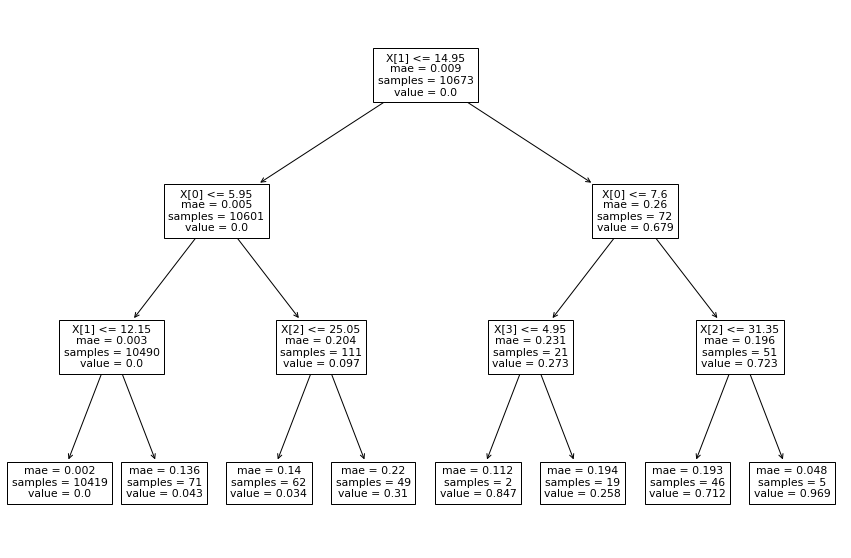

In [24]:
nba_dataset = full_nba_dataset[['VORP','WS','PER','BPM','Season','Share']]
choosen_model = tree.DecisionTreeRegressor(criterion='mae',max_depth=3)
model_score(dataframe=nba_dataset,model=choosen_model,features=['VORP','WS','PER','BPM'],iterations=1,path='./misses/decision_three')

plt.figure(figsize=(15, 10))
tree.plot_tree(choosen_model)  
plt.show()

Features  Importance
22     VORP    0.316924
20       WS    0.177866
12      PER    0.097975
21      BPM    0.073117
19     USG%    0.056928
11      PTS    0.027679
3       FT%    0.024067
9       TOV    0.021639
15     AST%    0.018955
2      eFG%    0.018293
6       AST    0.017928
0       3P%    0.017596
5       DRB    0.017342
10       PF    0.015796
13      TS%    0.013508
1       2P%    0.013137
7       STL    0.012831
8       BLK    0.012496
4       ORB    0.011969
18     TOV%    0.011821
14     TRB%    0.010682
17     BLK%    0.006057
16     STL%    0.005393

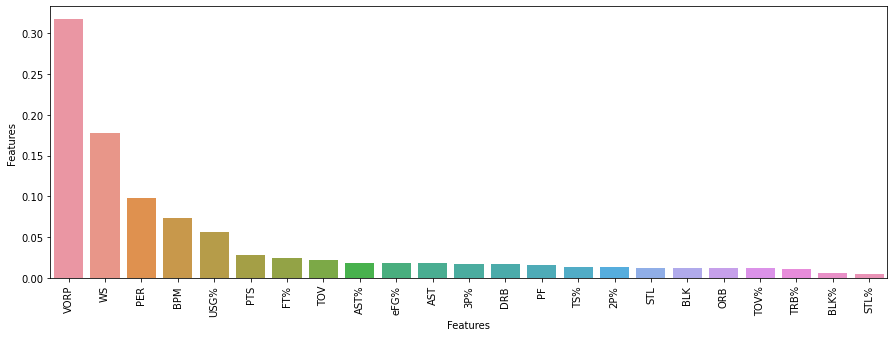

<Figure size 2160x1800 with 0 Axes>

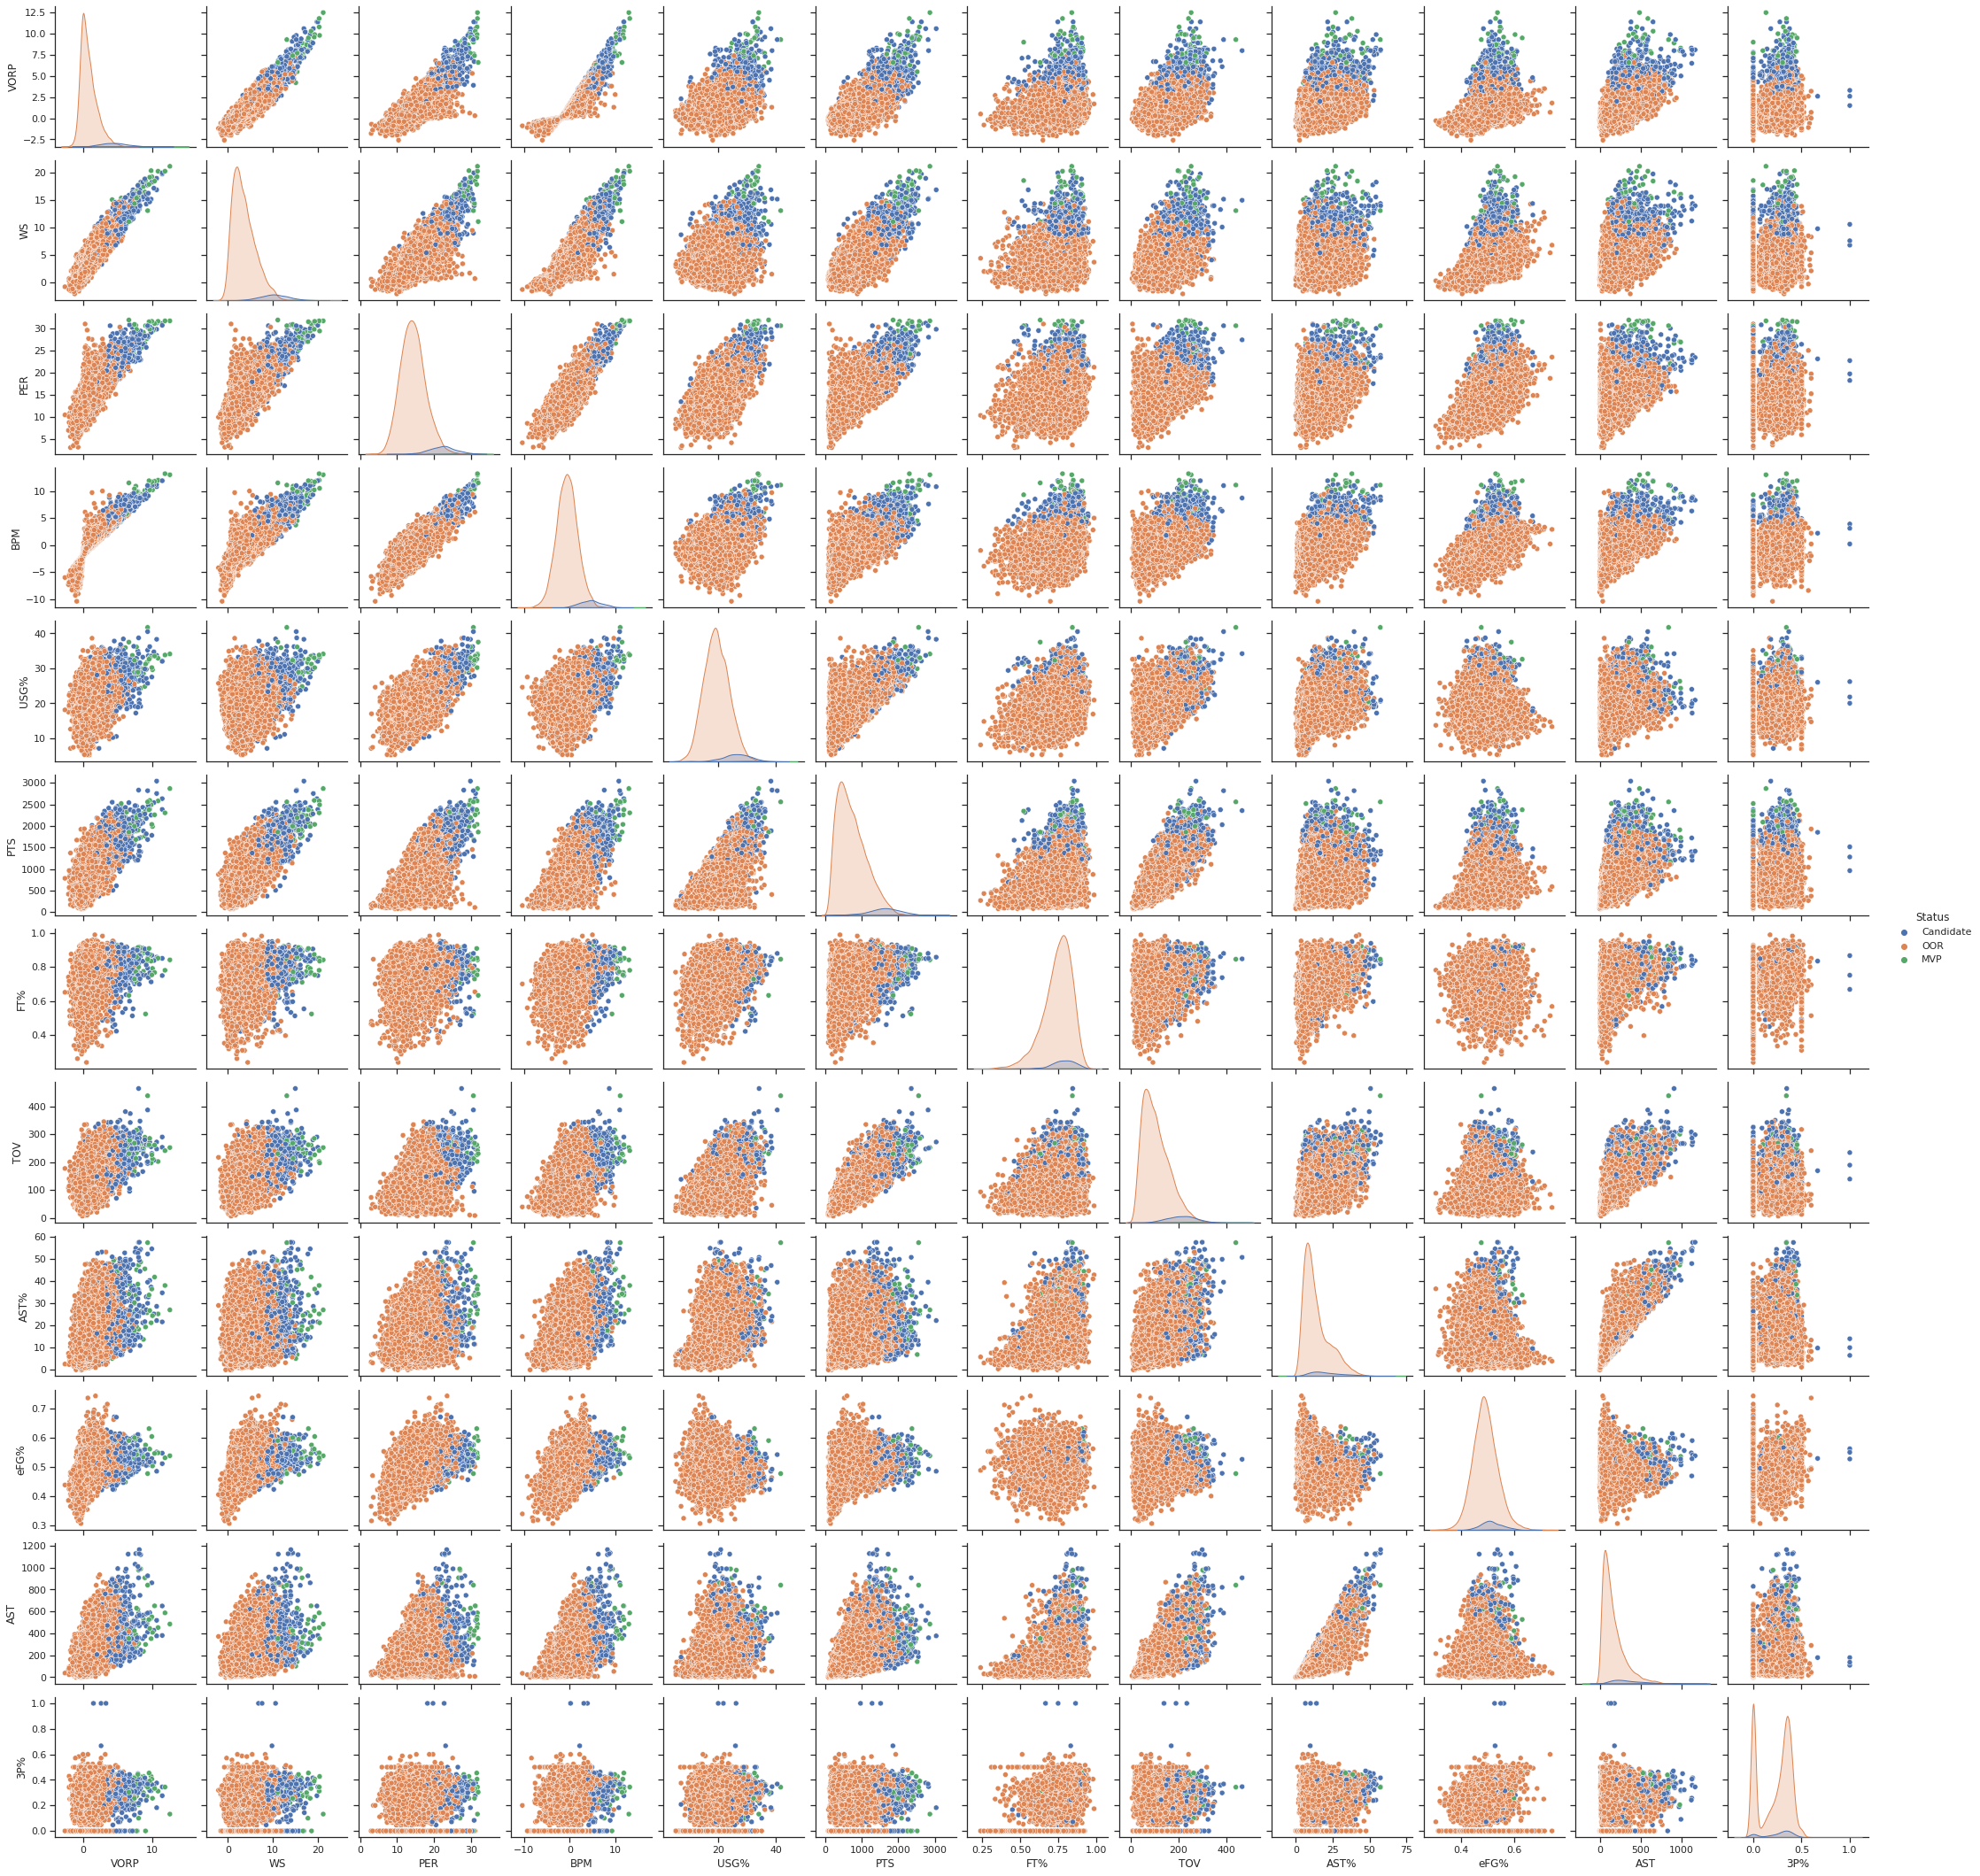

In [25]:
# model = ExtraTreesRegressor()
model = RandomForestRegressor()

# Literal Data
cols = ['Player', 'Pos', 'Age','Status'] 
nba_dataset = full_nba_dataset.drop(cols,axis=1)
X = nba_dataset.drop(['Share','Season'], axis=1)
y = nba_dataset['Share']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state=10)

# clf=RandomForestClassifier(n_estimators =10, random_state = 42, class_weight="balanced")

model.fit(X_train, y_train)

data_dict = { 'Features' : X_train.columns, 'Importance' : model.feature_importances_ }
# data_dict['Features'] = X_train.columns
# data_dict['Importance'] = model.feature_importances_

features = pd.DataFrame(data_dict).sort_values(by='Importance',ascending=False)
display(features)

nro_of_features = 12
feature_list = list(features['Features'][:nro_of_features])

plt.figure(figsize=(15, 5))
ax = sns.barplot(x=features['Features'], y=features['Importance'])
ax.tick_params(axis='x', rotation=90)
ax.set_ylabel('Features')

plt.figure(figsize=(30, 25)) 
sns.set_theme(style="ticks")
feature_list.append('Status')
sns.pairplot(full_nba_dataset[feature_list], hue="Status")

In [26]:
# [['VORP', 'WS', 'PER', 'BPM', 'USG%', 'PTS', 'Share', 'Season']]
# nba_dataset = full_nba_dataset.drop(['Player', 'Pos', 'Age','Status'],axis=1)
feature_list.extend(['Share', 'Season'])
print(feature_list)

nba_dataset = full_nba_dataset[feature_list].drop('Status',axis=1)

# nba_dataset = full_nba_dataset[['VORP', 'WS', 'PER', 'BPM', 'Share', 'Season']]
choosen_model = RandomForestRegressor(n_estimators=10,criterion='mse',max_depth=9)
model_score(dataframe=nba_dataset,model=choosen_model,features=feature_list,iterations=10,path='./misses/random_forest')

# criterion='mae',max_depth=3

['VORP', 'WS', 'PER', 'BPM', 'USG%', 'PTS', 'FT%', 'TOV', 'AST%', 'eFG%', 'AST', '3P%', 'Status', 'Share', 'Season']


At this point I figured out that maybe the team performance in the regular season also impacts the mvp choice.

To cover the team performance I had to do a few changes on the scrapping and standardize codes.